In [1]:
import numpy as np

np.set_printoptions(linewidth=1000, precision=4, suppress=True)

In [39]:
m = 10 # number of features
N = 2  # number of samples
data = np.random.random((N,m))
data

array([[0.86566042, 0.98435687, 0.75312609, 0.42884834, 0.59611465, 0.728631  , 0.01036735, 0.2879967 , 0.91993596, 0.22029225],
       [0.15559403, 0.69254529, 0.04080459, 0.55301444, 0.64981166, 0.57665805, 0.46147926, 0.71950348, 0.8047163 , 0.70244975]])

In [42]:
# compute the mean value of the data for each feature
means = np.mean(data, axis=0)
means

array([0.51062722, 0.83845108, 0.39696534, 0.49093139, 0.62296315, 0.65264452, 0.2359233 , 0.50375009, 0.86232613, 0.461371  ])

In [43]:
# center the data around the mean
data_red = data - means
data_red

array([[ 0.3550332 ,  0.14590579,  0.35616075, -0.06208305, -0.0268485 ,  0.07598647, -0.22555595, -0.21575339,  0.05760983, -0.24107875],
       [-0.3550332 , -0.14590579, -0.35616075,  0.06208305,  0.0268485 , -0.07598647,  0.22555595,  0.21575339, -0.05760983,  0.24107875]])

In [60]:
# compute covariance
(data_red.transpose() @ data_red)/N

array([[ 0.126 ,  0.0518,  0.1264, -0.022 , -0.0095,  0.027 , -0.0801, -0.0766,  0.0205, -0.0856],
       [ 0.0518,  0.0213,  0.052 , -0.0091, -0.0039,  0.0111, -0.0329, -0.0315,  0.0084, -0.0352],
       [ 0.1264,  0.052 ,  0.1269, -0.0221, -0.0096,  0.0271, -0.0803, -0.0768,  0.0205, -0.0859],
       [-0.022 , -0.0091, -0.0221,  0.0039,  0.0017, -0.0047,  0.014 ,  0.0134, -0.0036,  0.015 ],
       [-0.0095, -0.0039, -0.0096,  0.0017,  0.0007, -0.002 ,  0.0061,  0.0058, -0.0015,  0.0065],
       [ 0.027 ,  0.0111,  0.0271, -0.0047, -0.002 ,  0.0058, -0.0171, -0.0164,  0.0044, -0.0183],
       [-0.0801, -0.0329, -0.0803,  0.014 ,  0.0061, -0.0171,  0.0509,  0.0487, -0.013 ,  0.0544],
       [-0.0766, -0.0315, -0.0768,  0.0134,  0.0058, -0.0164,  0.0487,  0.0465, -0.0124,  0.052 ],
       [ 0.0205,  0.0084,  0.0205, -0.0036, -0.0015,  0.0044, -0.013 , -0.0124,  0.0033, -0.0139],
       [-0.0856, -0.0352, -0.0859,  0.015 ,  0.0065, -0.0183,  0.0544,  0.052 , -0.0139,  0.0581]])

In [62]:
np.cov(data_red, rowvar=False, bias=True)

array([[ 0.126 ,  0.0518,  0.1264, -0.022 , -0.0095,  0.027 , -0.0801, -0.0766,  0.0205, -0.0856],
       [ 0.0518,  0.0213,  0.052 , -0.0091, -0.0039,  0.0111, -0.0329, -0.0315,  0.0084, -0.0352],
       [ 0.1264,  0.052 ,  0.1269, -0.0221, -0.0096,  0.0271, -0.0803, -0.0768,  0.0205, -0.0859],
       [-0.022 , -0.0091, -0.0221,  0.0039,  0.0017, -0.0047,  0.014 ,  0.0134, -0.0036,  0.015 ],
       [-0.0095, -0.0039, -0.0096,  0.0017,  0.0007, -0.002 ,  0.0061,  0.0058, -0.0015,  0.0065],
       [ 0.027 ,  0.0111,  0.0271, -0.0047, -0.002 ,  0.0058, -0.0171, -0.0164,  0.0044, -0.0183],
       [-0.0801, -0.0329, -0.0803,  0.014 ,  0.0061, -0.0171,  0.0509,  0.0487, -0.013 ,  0.0544],
       [-0.0766, -0.0315, -0.0768,  0.0134,  0.0058, -0.0164,  0.0487,  0.0465, -0.0124,  0.052 ],
       [ 0.0205,  0.0084,  0.0205, -0.0036, -0.0015,  0.0044, -0.013 , -0.0124,  0.0033, -0.0139],
       [-0.0856, -0.0352, -0.0859,  0.015 ,  0.0065, -0.0183,  0.0544,  0.052 , -0.0139,  0.0581]])

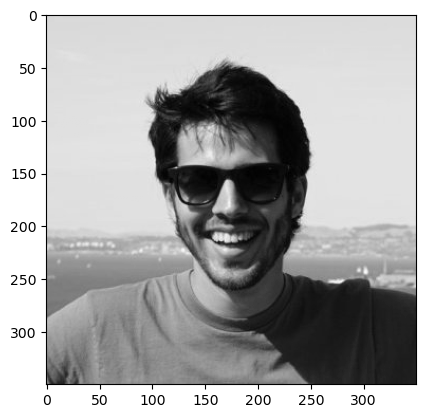

In [8]:
from PIL import Image
from matplotlib import pyplot as plt

image = np.array(Image.open('/home/stefano/Pictures/Profile/profile.jpg'))

image = image.mean(axis=2)

plt.imshow(image, 'gray')

In [21]:
# compute one eigenface of an image using the svd and return it in the right shape
def get_eigenface(image, idx = 0):
    U, S, V = np.linalg.svd(image)
    eigenface = np.outer(U[:,idx] * S[idx], V[idx,:])
    return eigenface

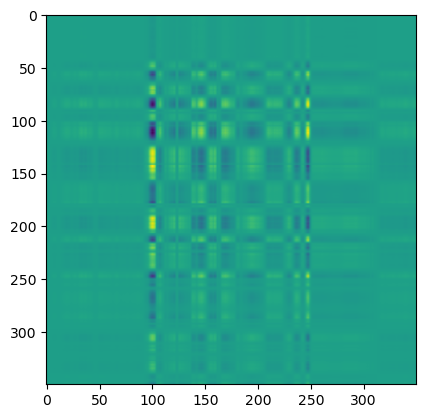

In [25]:
idx = 10
eface = get_eigenface(image, idx)
plt.imshow(eface)

In [41]:
# compress an image by percentage of information loss measuerd by the singular values
def compress_image(image, percentage = 0.9):
    U, S, V = np.linalg.svd(image)
    # compute the number of singular values needed to keep the percentage of information
    n = np.sum(np.cumsum(S)/np.sum(S) < percentage)
    # compute the compressed image
    compressed = U[:,:n] @ np.diag(S[:n]) @ V[:n,:]
    return compressed, n, n/len(S)

Compression ratio: 0.13
Number of singular values: 46


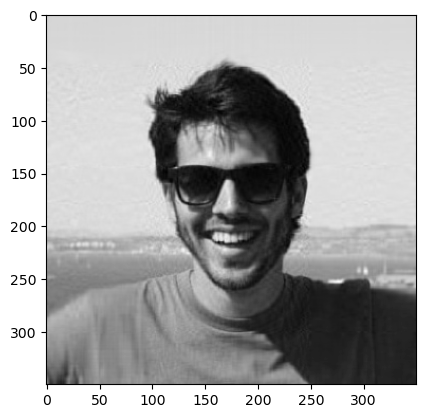

In [44]:
compressed, n, compression_ratio = compress_image(image, 0.9)
plt.imshow(compressed, 'gray')
print(f'Compression ratio: {compression_ratio:.2f}')
print(f'Number of singular values: {n}')